In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SKTIME

from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.transformations.series.boxcox import LogTransformer
from sktime.forecasting.ets import AutoETS

from sktime.performance_metrics.forecasting import MeanSquaredError
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.model_selection import ExpandingWindowSplitter
from sktime.forecasting.model_selection import ForecastingGridSearchCV
from sktime.forecasting.compose import TransformedTargetForecaster

from sktime.forecasting.statsforecast import StatsForecastAutoARIMA
from sktime.forecasting.arima import ARIMA

# Statsmodels

import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL, seasonal_decompose


In [3]:
df = pd.read_csv('../data/raw/datos.csv')
df["Date"] = pd.to_datetime(df["Date"])
df.set_index('Date', inplace=True)
df = df.sort_index()
df.index = df.index.to_period('D')

In [4]:
holidays = df[['DayOfWeek']]

Primero realizamos un procesamiento de datos, 

La primera operacion que haremos seran crear dos nuevas tablas, una llamada zona en la que la nueva variable tendra un formato de zona, es decir, el formato de la variable será T1,T2 o T3.

La segunda modificación será crear una nueva variable de en formato de año y mes, para así poder realizar los distintos calculos de formatos mensuales

In [5]:
# He decidido eliminar los valores que la columna open sea igual a cero 
#df = df[df['Open'] != 0]

In [6]:
df = df[['Store', 'Sales']]

In [7]:
df.head()

Store  Sales
Date                   
2013-01-01   T3d      0
2013-01-01   T1a      0
2013-01-01   T1b      0
2013-01-01   T1c      0
2013-01-01   T2a      0

In [8]:
from sktime.utils.plotting import plot_series
import matplotlib.dates as mdates

def plot_sales(df, store, year):
    
    # Filtrar el dataframe para seleccionar solo la tienda y año especificados
    df_store_year = df[(df['Store'] == store) & (df.index.year == year)]   
    # Graficar la serie temporal con plot_series
    plot_series(df_store_year['Sales'], markers='o')
    plt.xlabel("Fecha")

    plt.ylabel("Ventas")
    plt.legend() 

### 1. Graficar las ventas diarias de las 10 tiendas.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


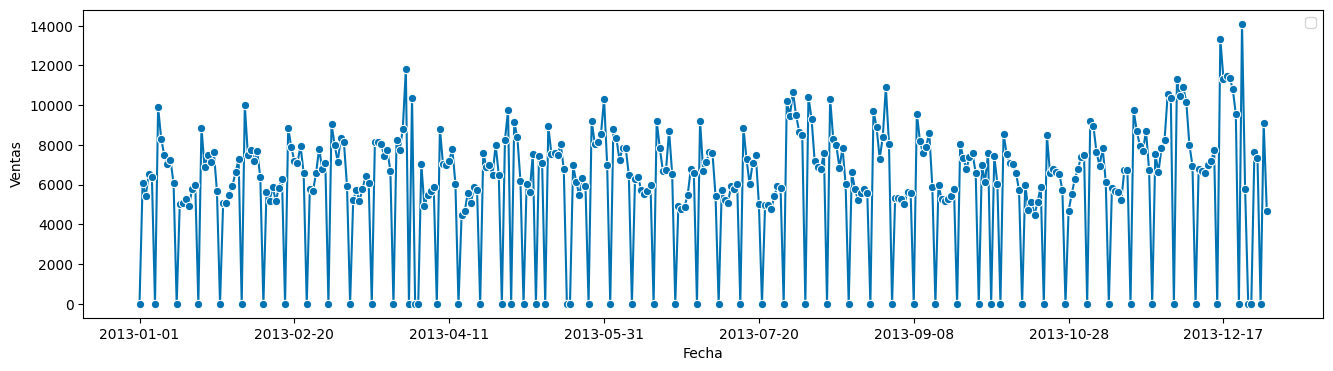

In [9]:
plot_sales(df,'T1a',2013)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


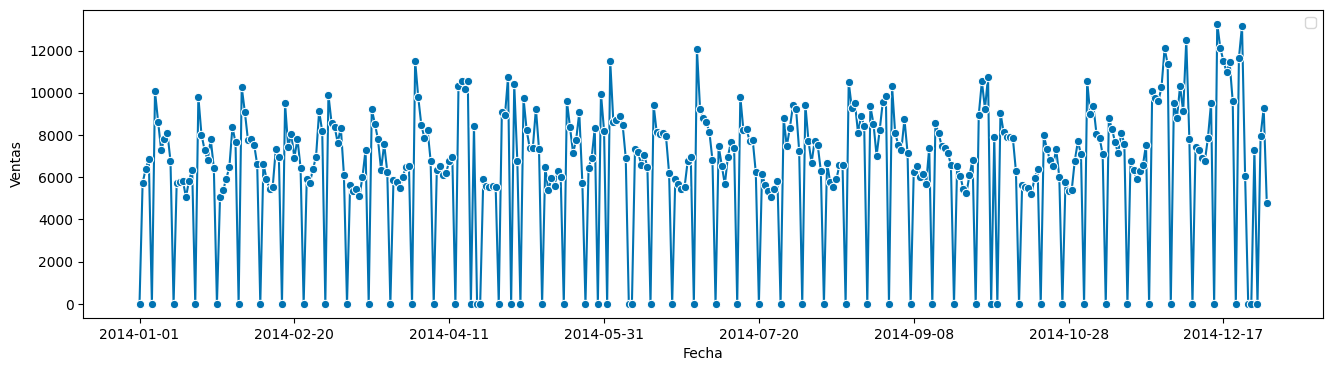

In [10]:
plot_sales(df,'T1a', 2014)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


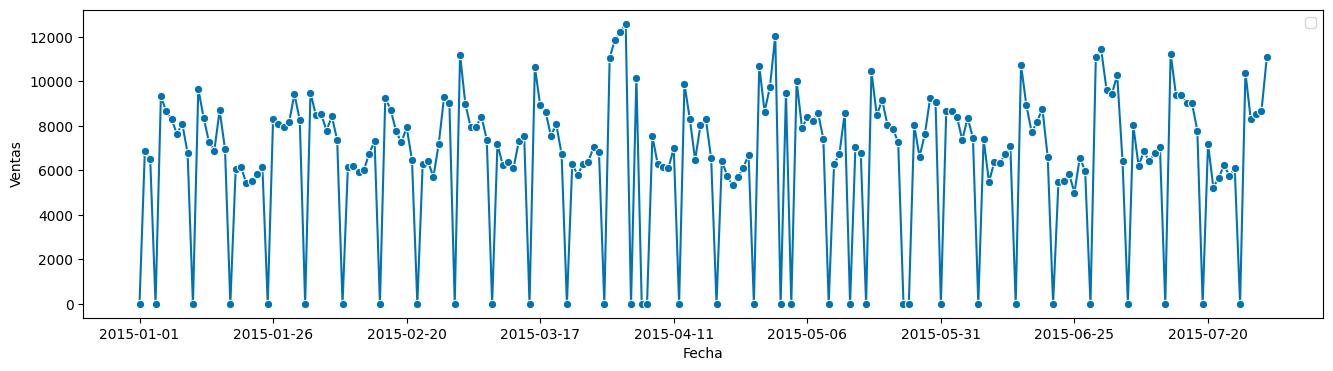

In [11]:
plot_sales(df,'T1a', 2015)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


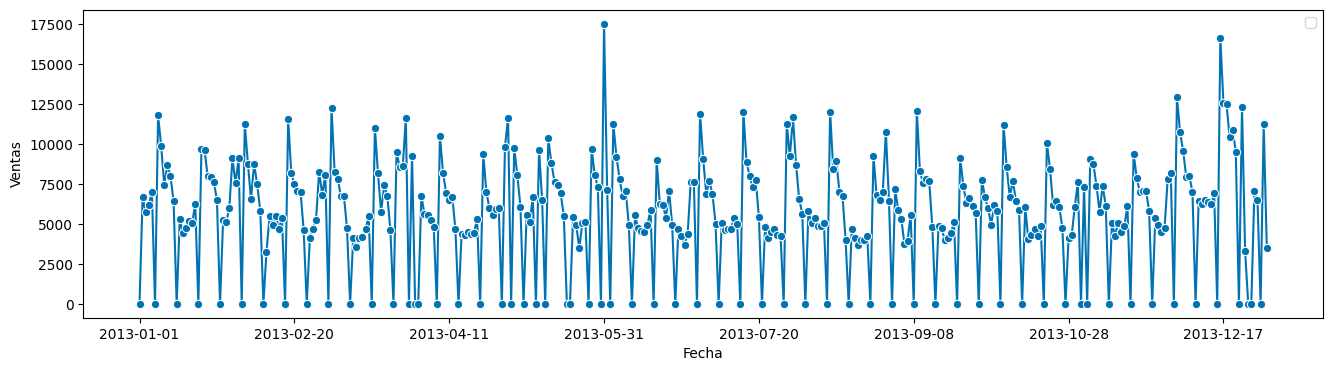

In [12]:
plot_sales(df,'T1b', 2013)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


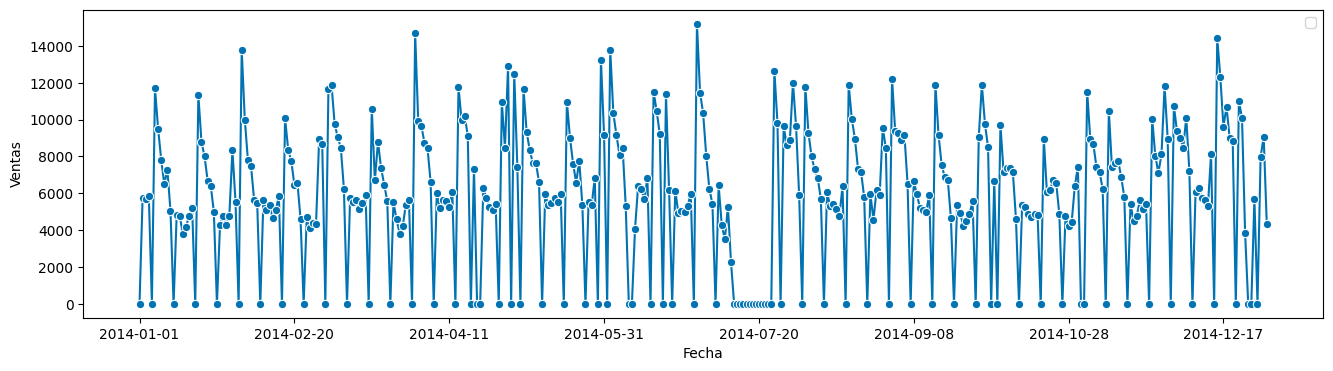

In [13]:
plot_sales(df,'T1b', 2014)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


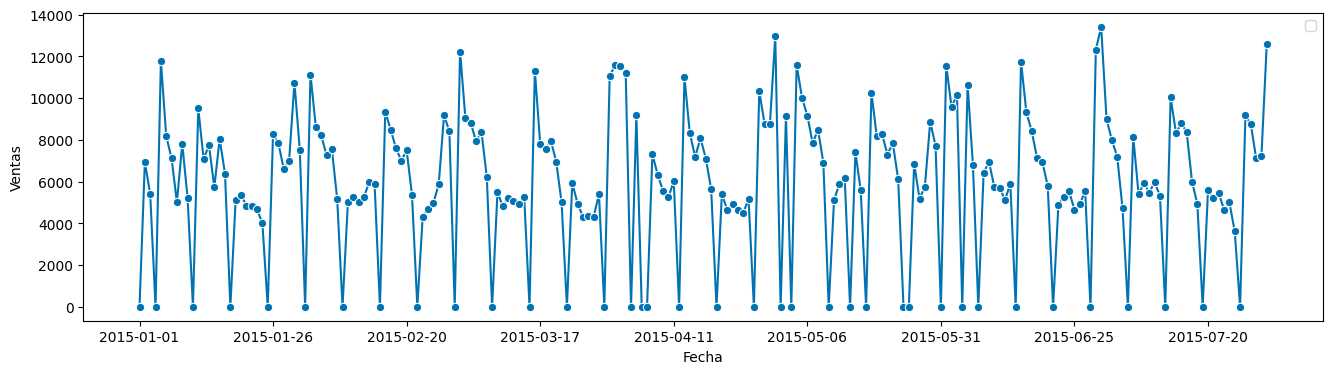

In [14]:
plot_sales(df,'T1b', 2015)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


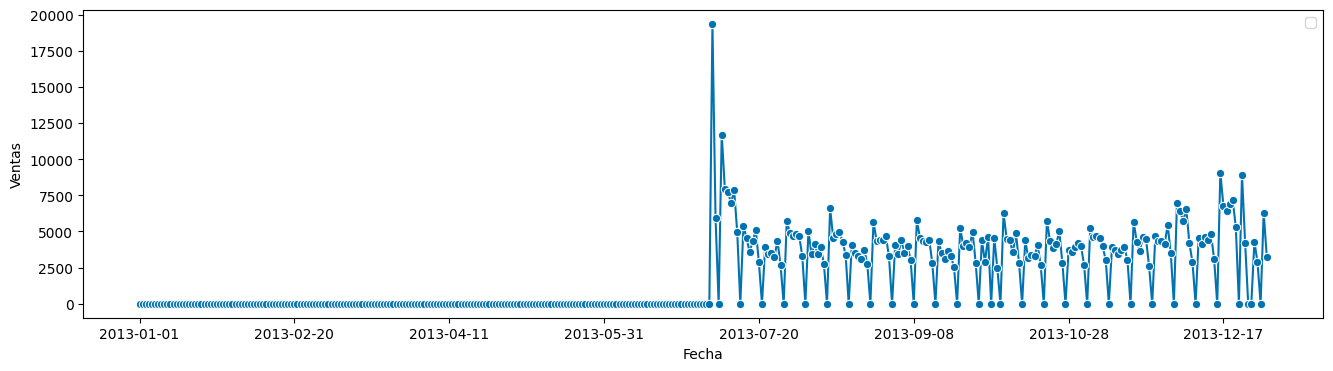

In [15]:
plot_sales(df,'T1c', 2013)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


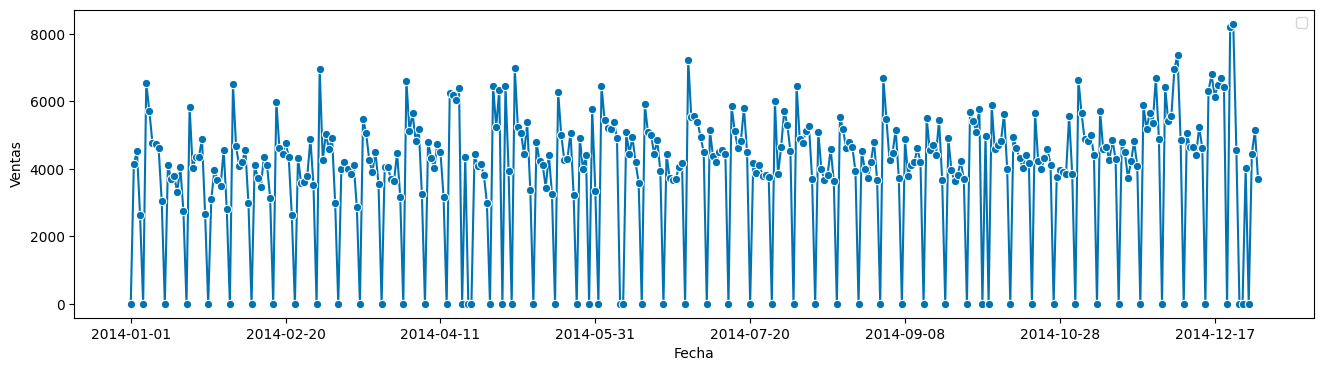

In [16]:
plot_sales(df,'T1c', 2014)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


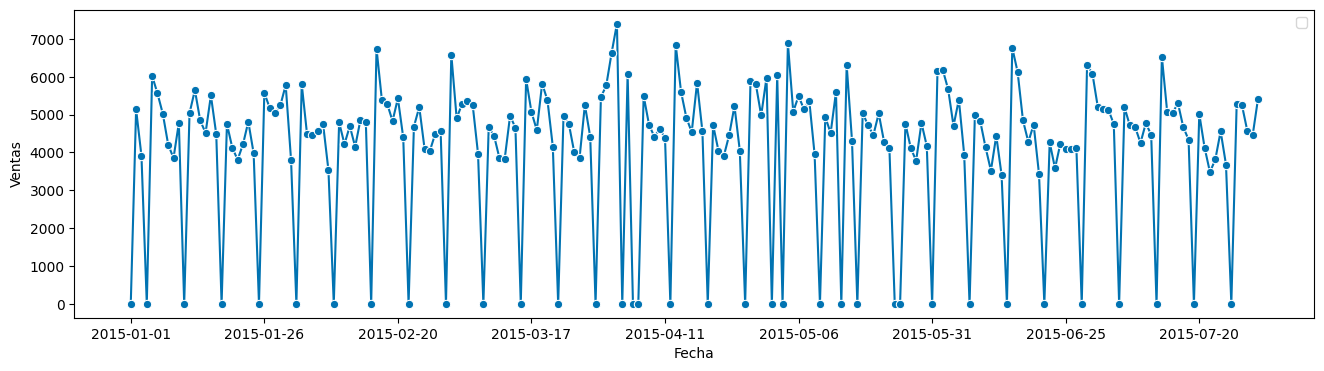

In [17]:
plot_sales(df,'T1c', 2015)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


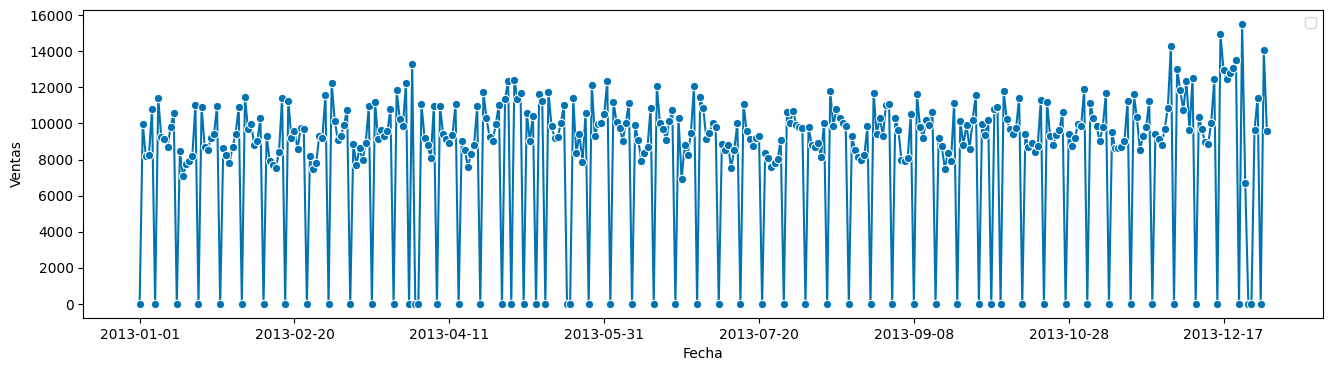

In [18]:
plot_sales(df,'T2a', 2013)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


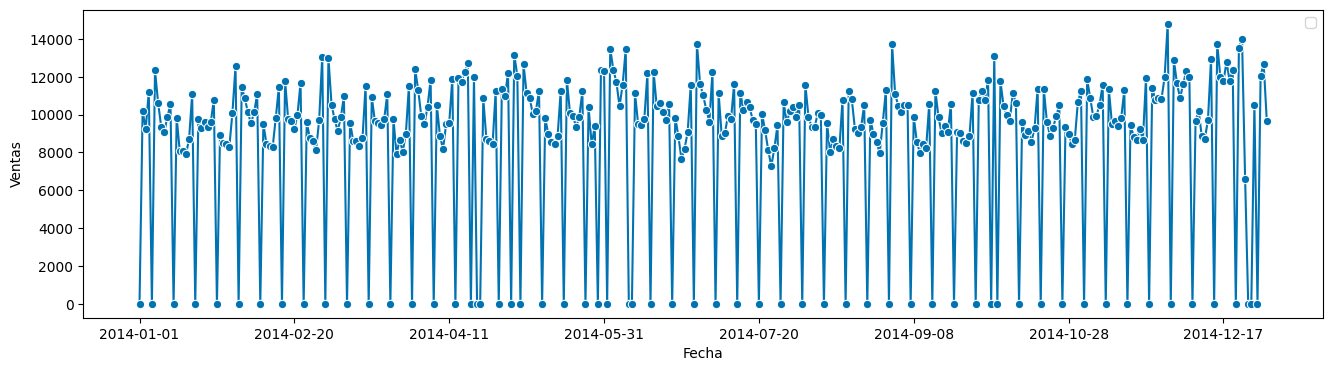

In [19]:
plot_sales(df,'T2a', 2014)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


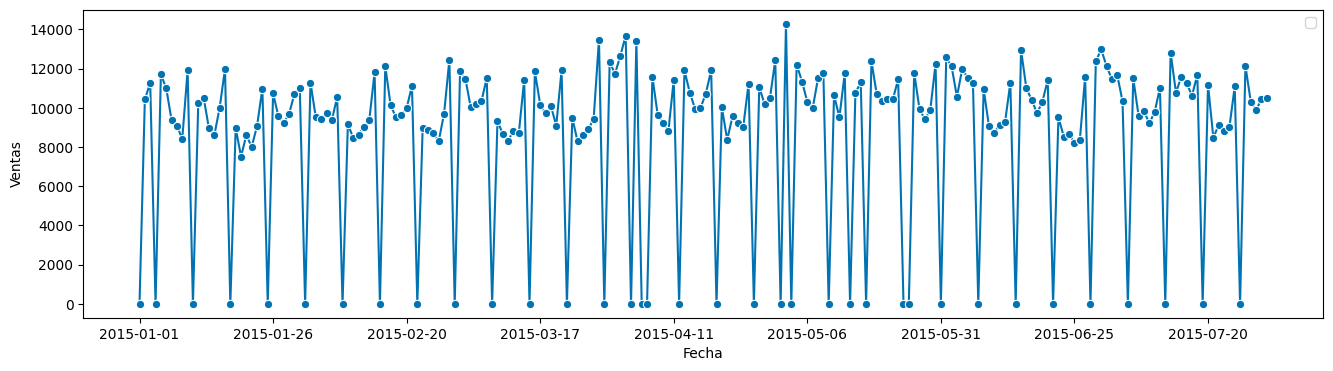

In [20]:
plot_sales(df,'T2a', 2015)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


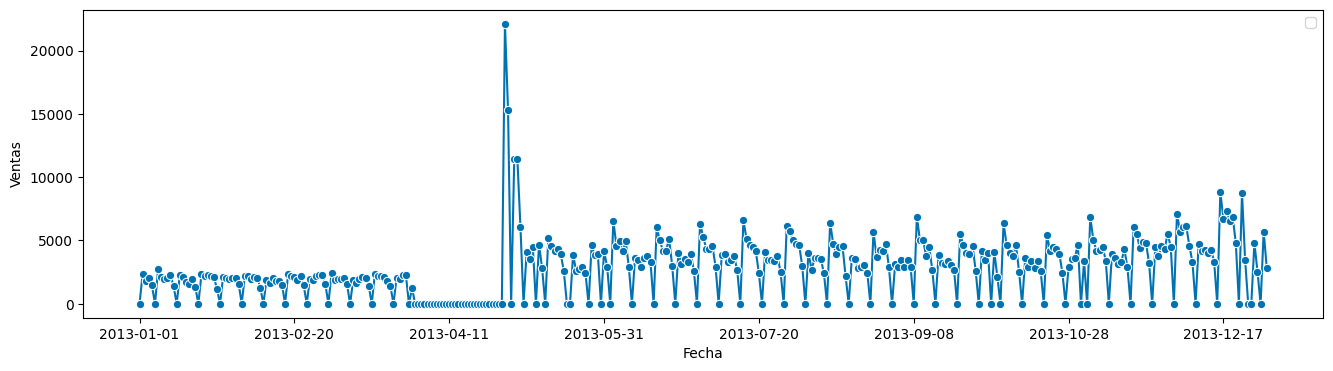

In [21]:
plot_sales(df,'T2b', 2013)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


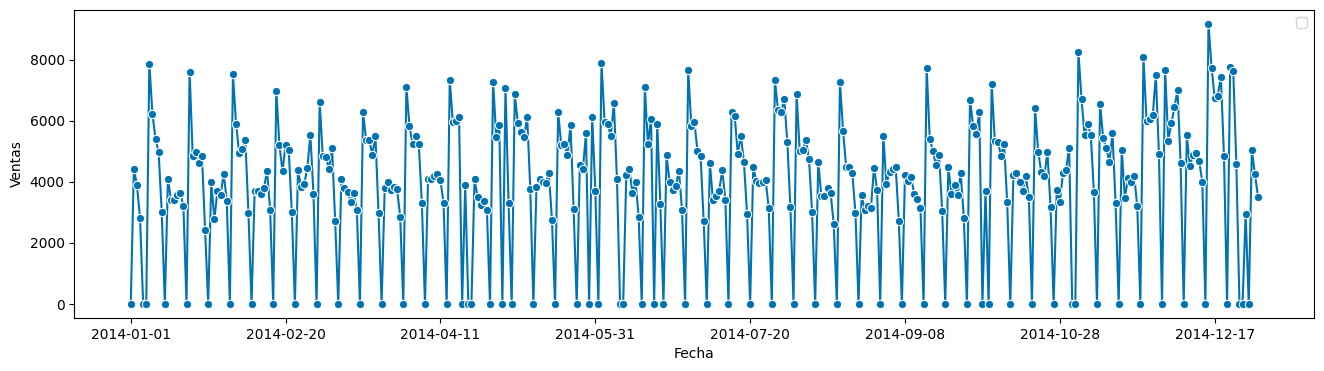

In [22]:
plot_sales(df,'T2b', 2014)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


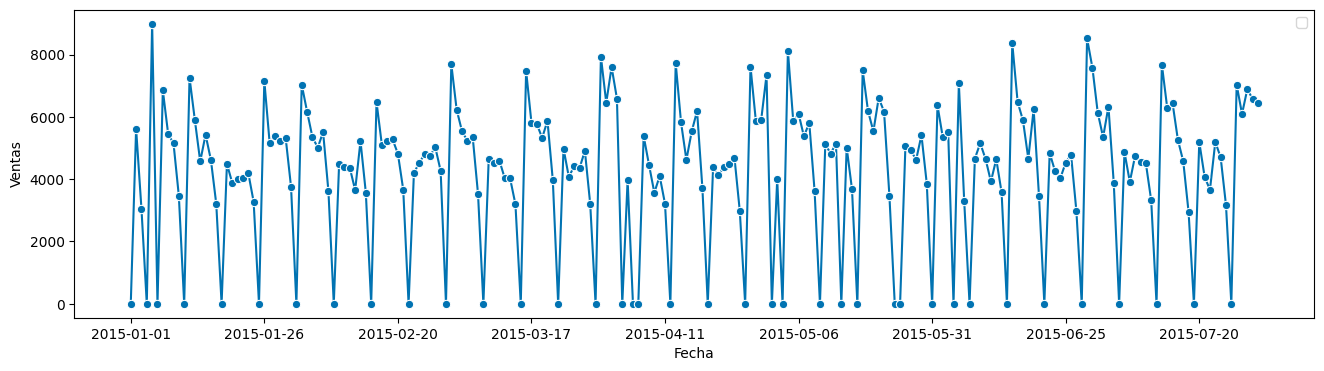

In [23]:
plot_sales(df,'T2b', 2015)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


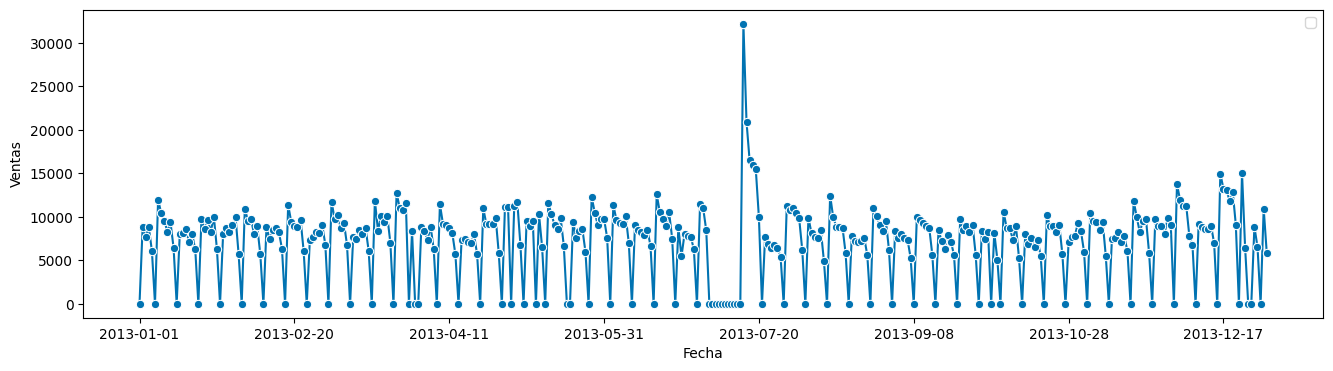

In [24]:
plot_sales(df,'T2c', 2013)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


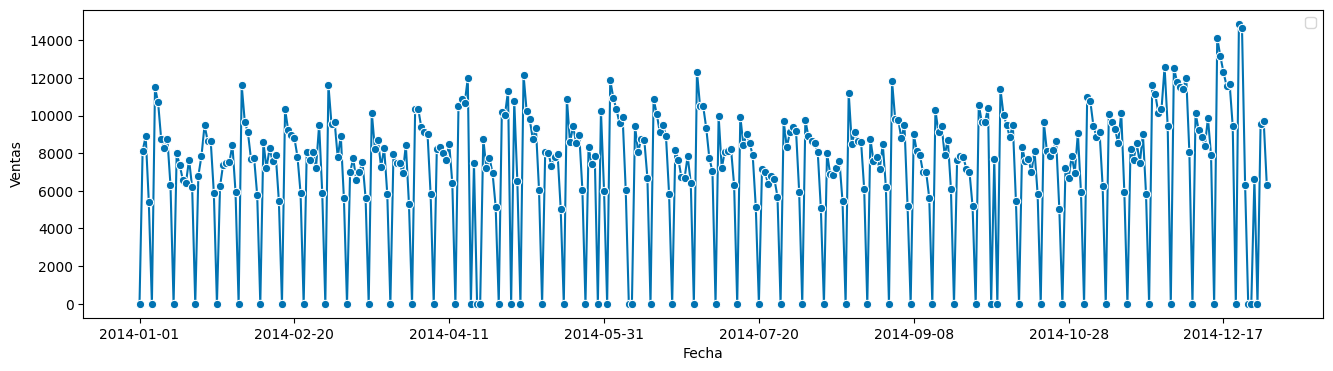

In [25]:
plot_sales(df,'T2c', 2014)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


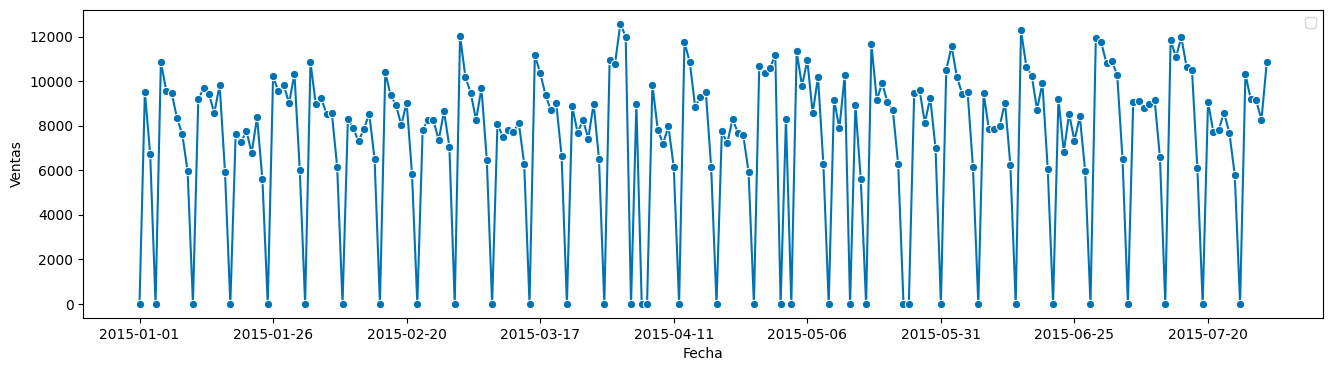

In [26]:
plot_sales(df,'T2c', 2015)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


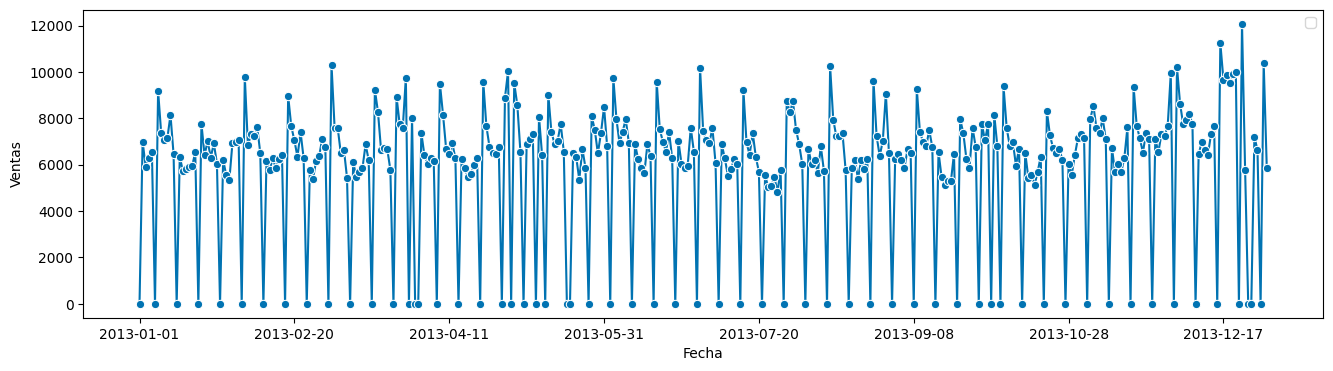

In [27]:
plot_sales(df,'T3a', 2013)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


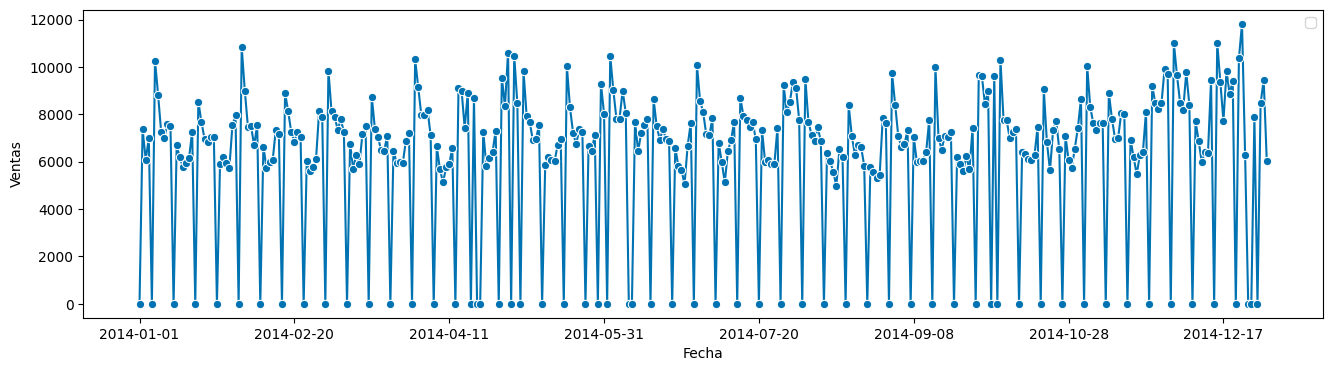

In [28]:
plot_sales(df,'T3a', 2014)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


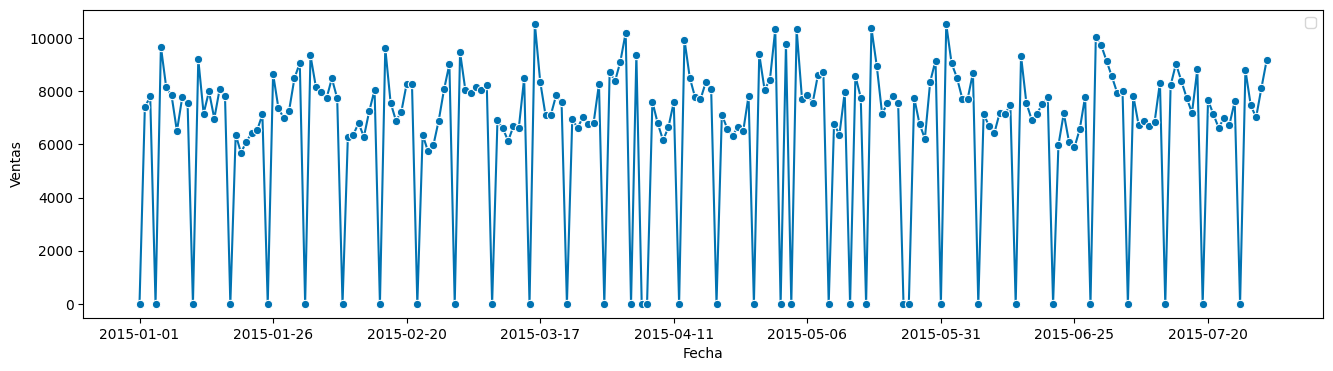

In [29]:
plot_sales(df,'T3a', 2015)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


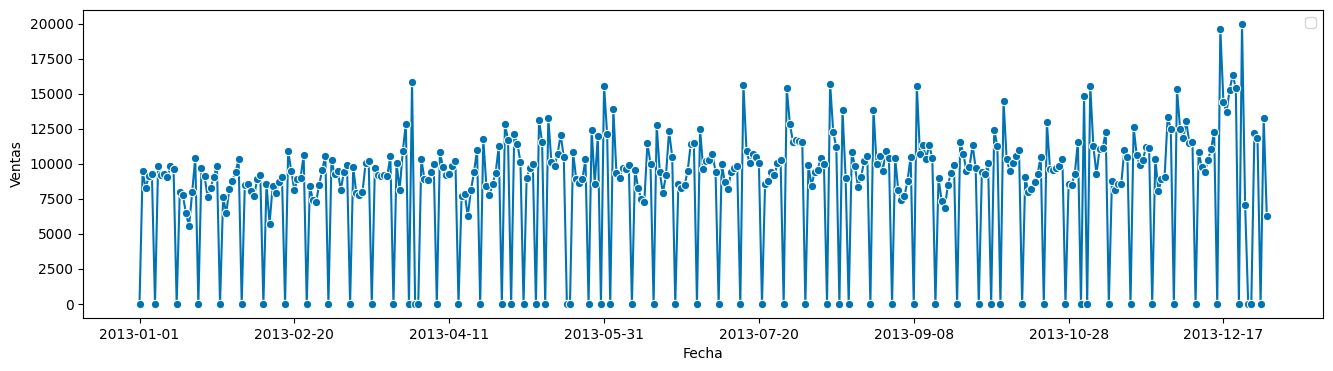

In [30]:
plot_sales(df,'T3b', 2013)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


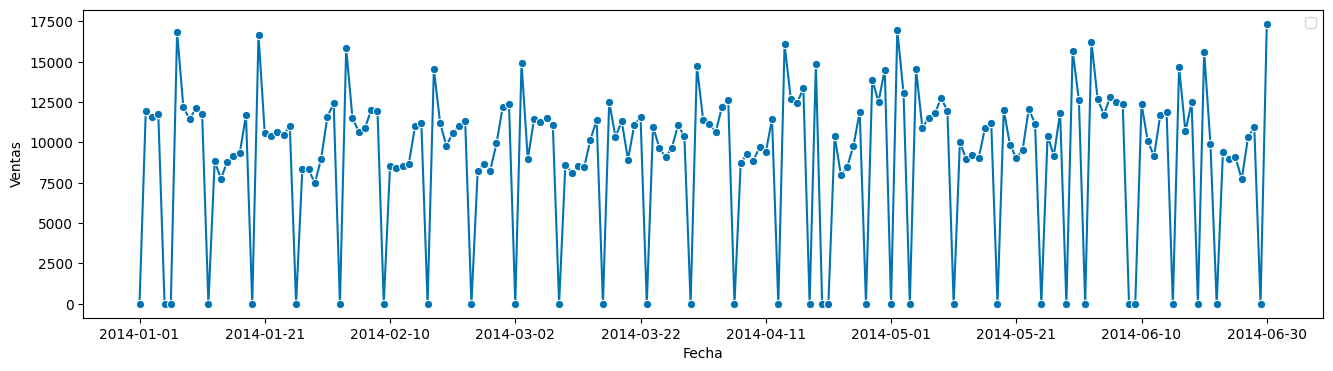

In [31]:
plot_sales(df,'T3b', 2014)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


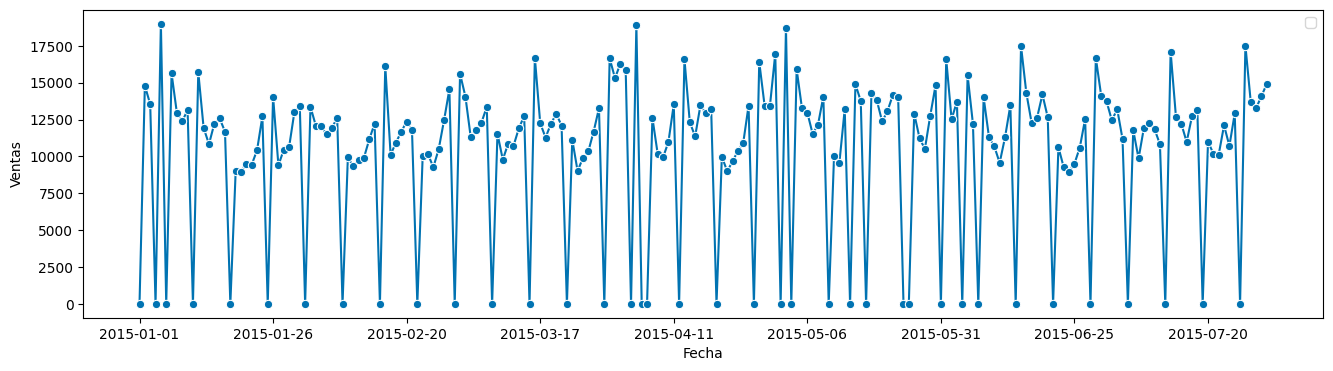

In [32]:
plot_sales(df,'T3b', 2015)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


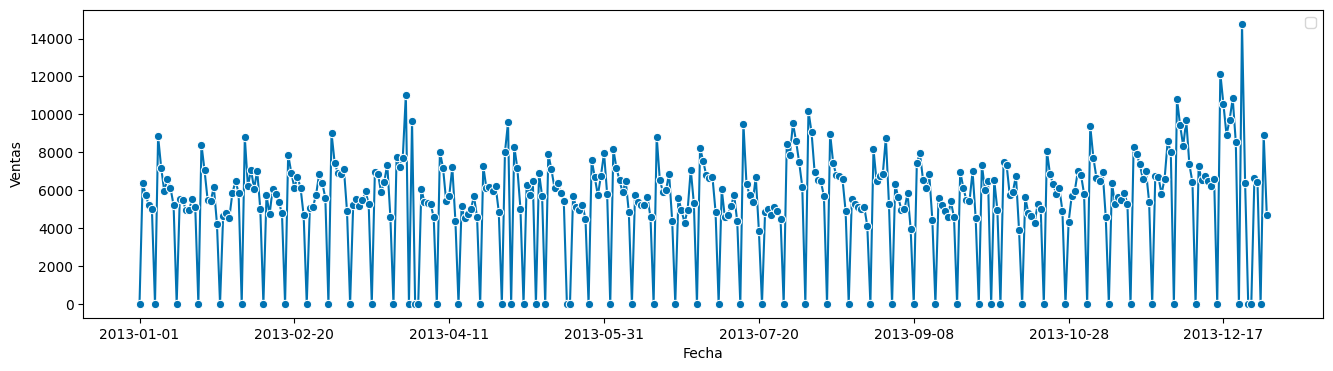

In [33]:
plot_sales(df,'T3c', 2013)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


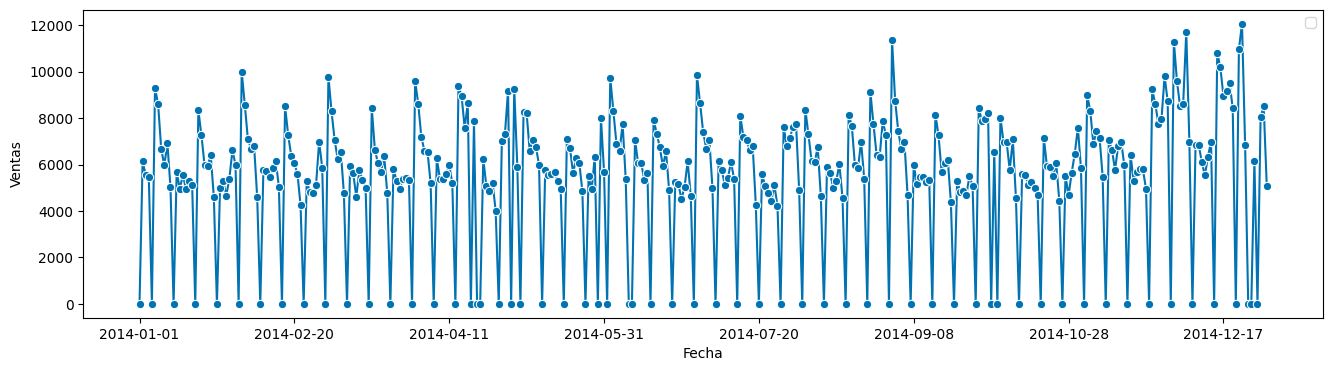

In [34]:
plot_sales(df,'T3c', 2014)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


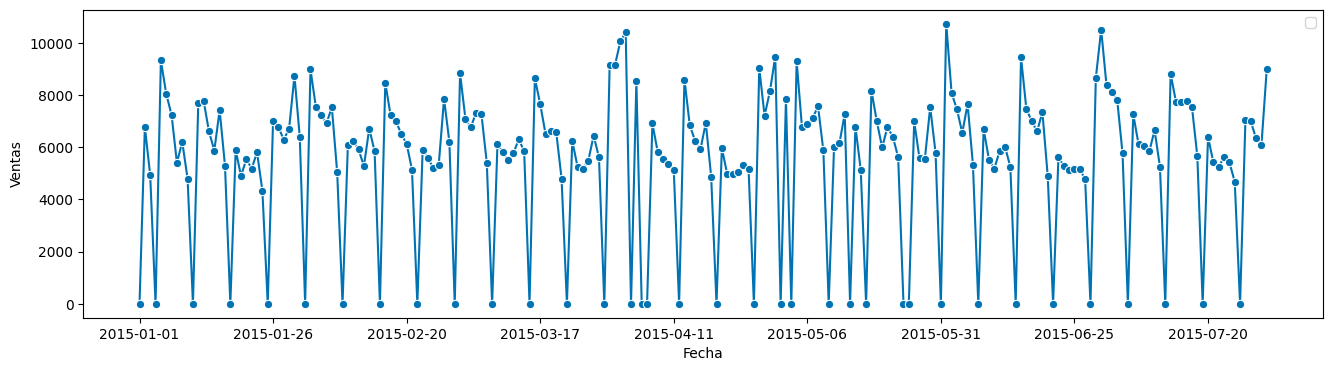

In [35]:
plot_sales(df,'T3c', 2015)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


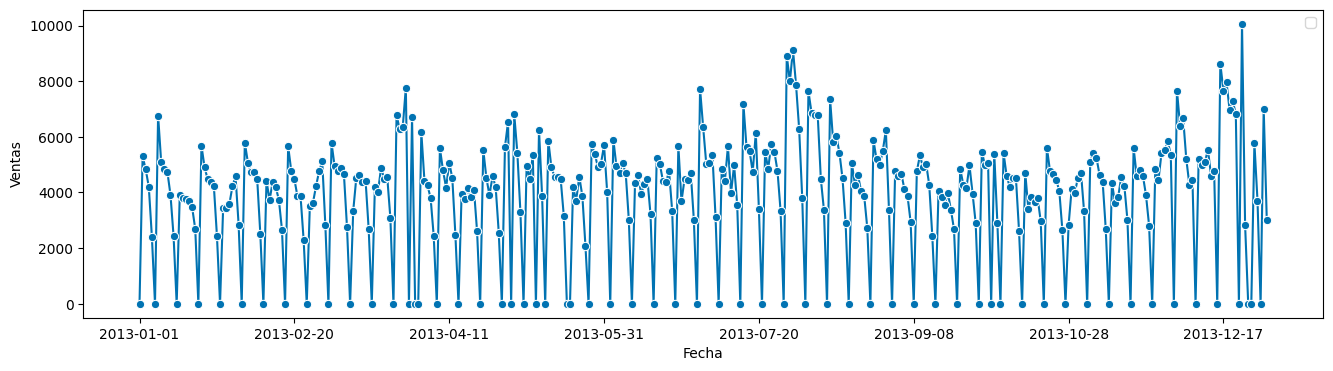

In [36]:
plot_sales(df,'T3d', 2013)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


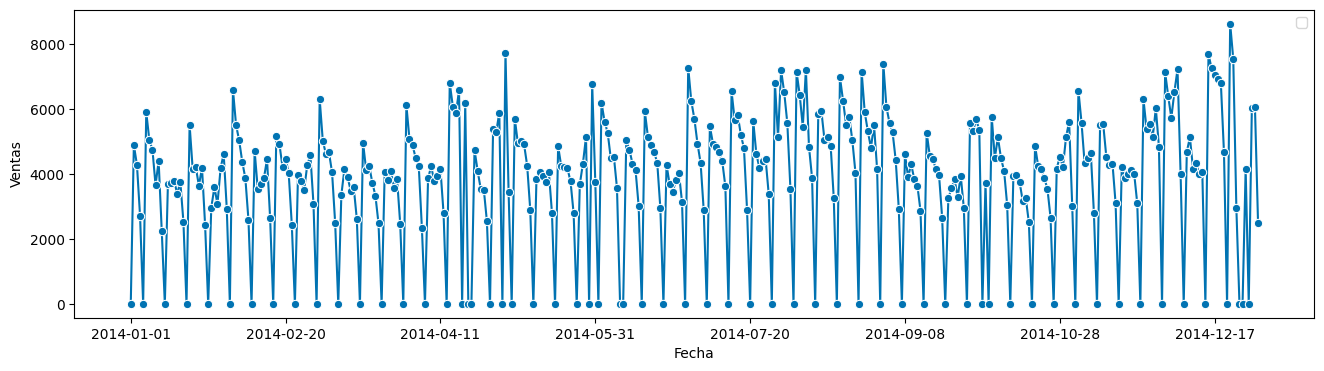

In [37]:
plot_sales(df,'T3d', 2014)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


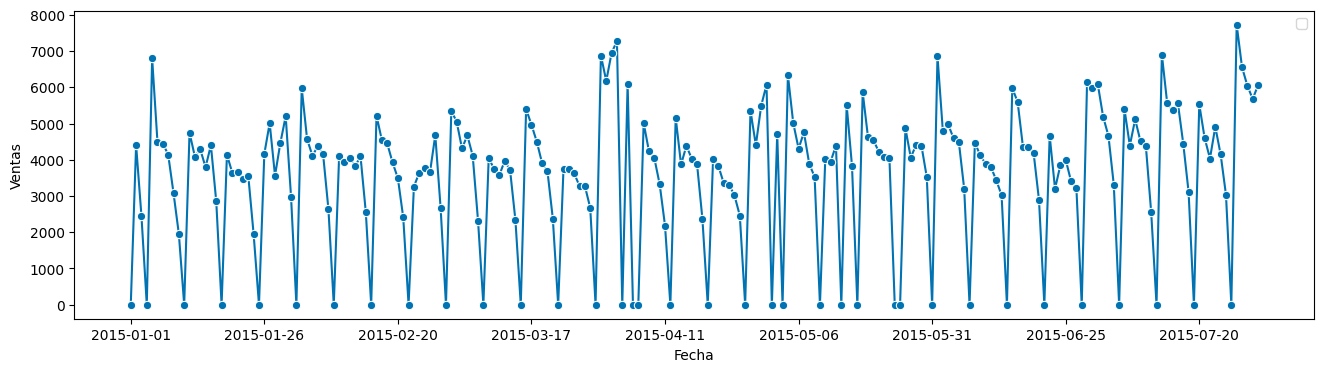

In [38]:
plot_sales(df,'T3d', 2015)

### 2. Graficar las ventas diarias de las 3 zonas.

In [39]:
df.head()

Store  Sales
Date                   
2013-01-01   T3d      0
2013-01-01   T1a      0
2013-01-01   T1b      0
2013-01-01   T1c      0
2013-01-01   T2a      0

In [40]:
def get_zone(store):
  return store[1]

df['Zone'] = df['Store'].apply(get_zone)

In [41]:
ventas_diarias = df.groupby(['Date', 'Zone'])['Sales'].sum()

In [42]:
ventas_diarias = ventas_diarias.reset_index()
ventas_diarias.columns = ['Date', 'Zone', 'Sales']

In [43]:
ventas_diarias=ventas_diarias.set_index('Date')

In [44]:
ventas_diarias.head()

Zone  Sales
Date                  
2013-01-01    1      0
2013-01-01    2      0
2013-01-01    3      0
2013-01-02    1  12748
2013-01-02    2  21078

In [45]:
df_zone1 = ventas_diarias[ventas_diarias['Zone'] == '1']

In [46]:
df_zone1 = df_zone1[['Sales']]

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: >)

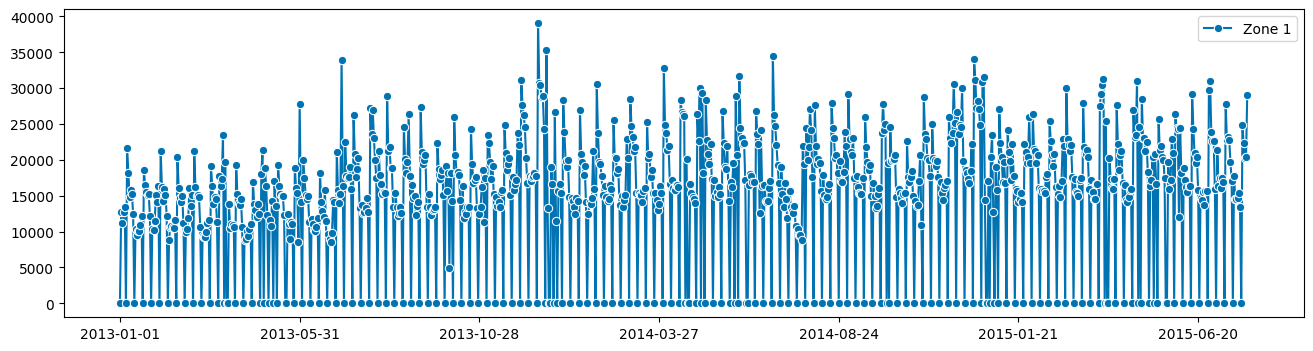

In [47]:
plot_series(df_zone1, labels=["Zone 1"])

In [48]:
df_zone2 = ventas_diarias[ventas_diarias['Zone'] == '2']
df_zone2 = df_zone2[['Sales']]

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: >)

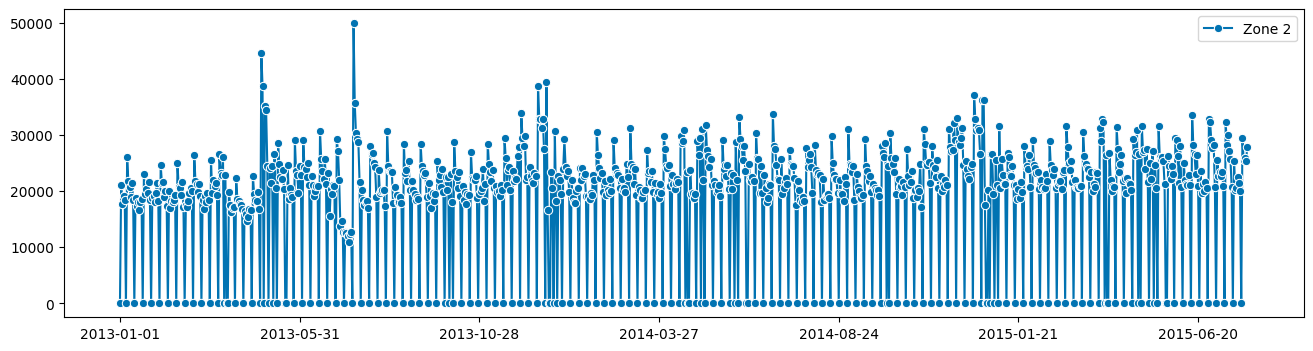

In [49]:
plot_series(df_zone2, labels=["Zone 2"])

In [50]:
df_zone3 = ventas_diarias[ventas_diarias['Zone'] == '3']
df_zone3 = df_zone3[['Sales']]

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: >)

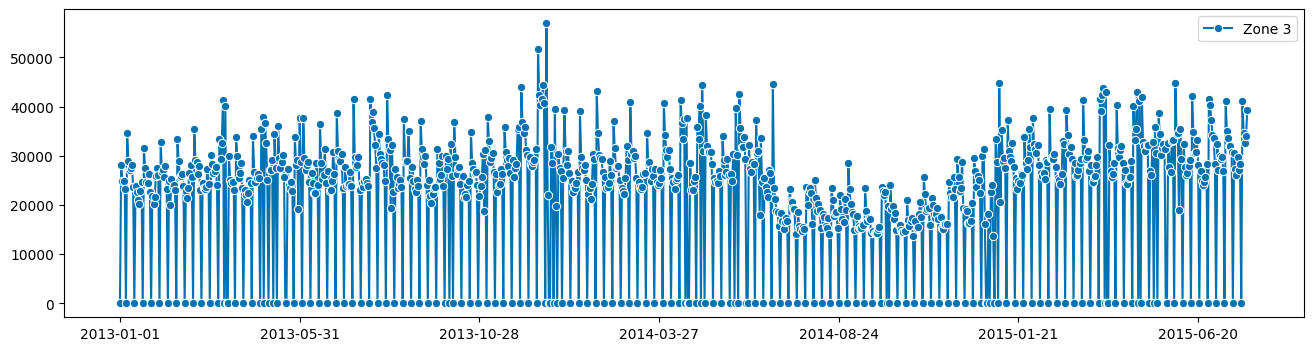

In [51]:
plot_series(df_zone3, labels=["Zone 3"])

### 3. Graficar las ventas totales diarias.

In [52]:
ventas_T_diarias = df.groupby(['Date'])['Sales'].sum()
ventas_T_diarias = ventas_T_diarias.reset_index()
ventas_diarias.columns = ['Date', 'Sales']

In [53]:
ventas_T_diarias=ventas_T_diarias.set_index('Date')

In [54]:
ventas_T_diarias.head()

Sales
Date             
2013-01-01      0
2013-01-02  61926
2013-01-03  53588
2013-01-04  56578
2013-01-05  54938

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: xlabel='Fecha', ylabel='Ventas'>)

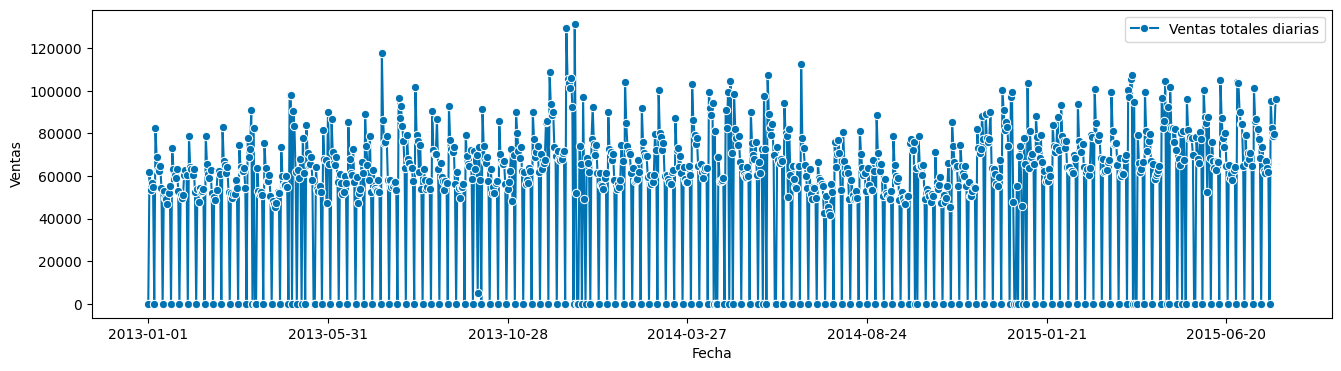

In [55]:
plot_series(ventas_T_diarias, labels=["Ventas totales diarias"],x_label= 'Fecha', y_label='Ventas')

#### Grafica por años 

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: xlabel='Fecha', ylabel='Ventas'>)

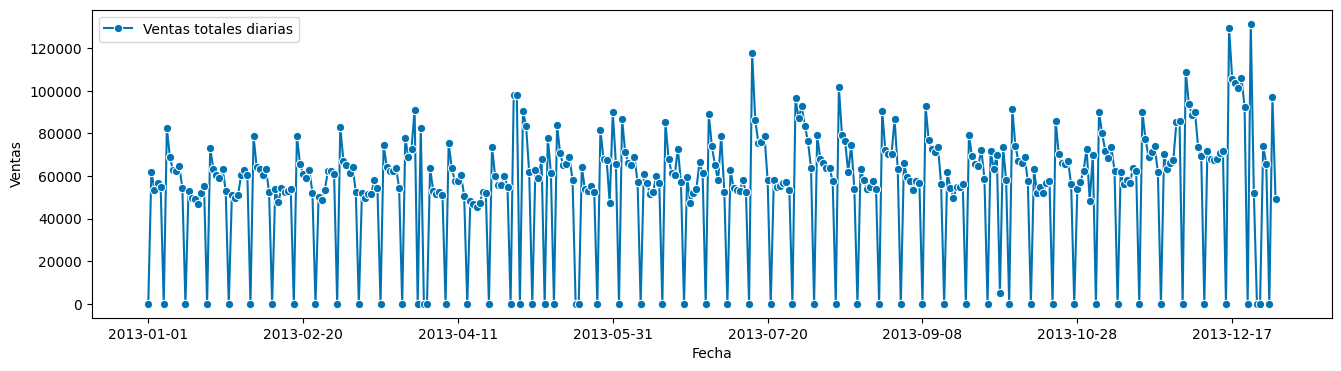

In [56]:
# Grafica de 2013
ventas_T_diarias_2013 = ventas_T_diarias.loc[ventas_T_diarias.index.year == 2013]
plot_series(ventas_T_diarias_2013, labels=["Ventas totales diarias"],x_label= 'Fecha', y_label='Ventas')

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: xlabel='Fecha', ylabel='Ventas'>)

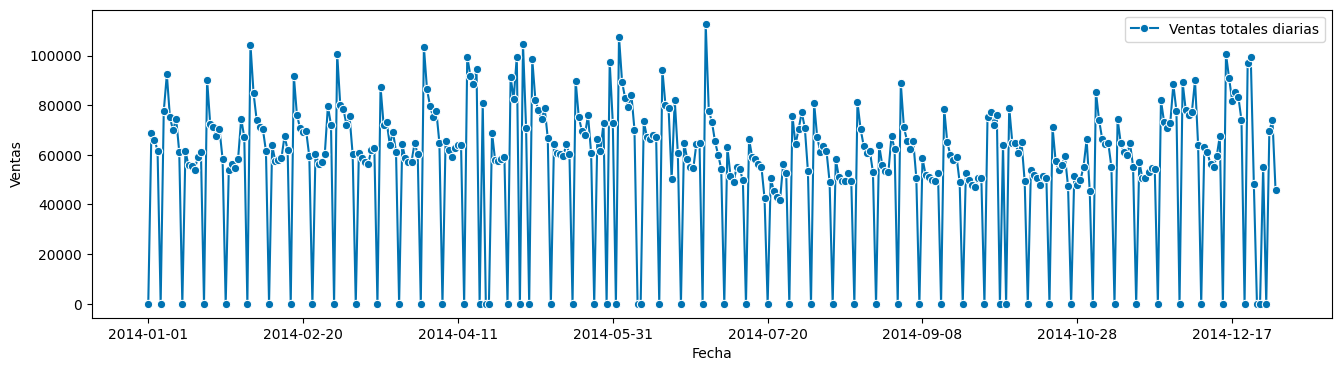

In [57]:
# Grafica de 2014
ventas_T_diarias_2014 = ventas_T_diarias.loc[ventas_T_diarias.index.year == 2014]
plot_series(ventas_T_diarias_2014, labels=["Ventas totales diarias"],x_label= 'Fecha', y_label='Ventas')

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: xlabel='Fecha', ylabel='Ventas'>)

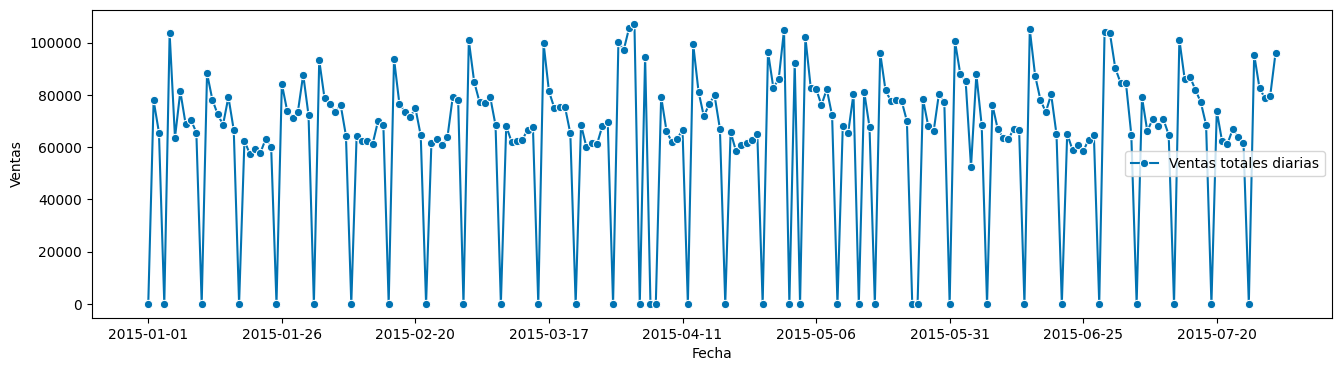

In [58]:
# Grafica de 2015
ventas_T_diarias_2015 = ventas_T_diarias.loc[ventas_T_diarias.index.year == 2015]
plot_series(ventas_T_diarias_2015, labels=["Ventas totales diarias"],x_label= 'Fecha', y_label='Ventas')

Text(0.5, 1.0, 'Ventas tos: Transformación LOG')

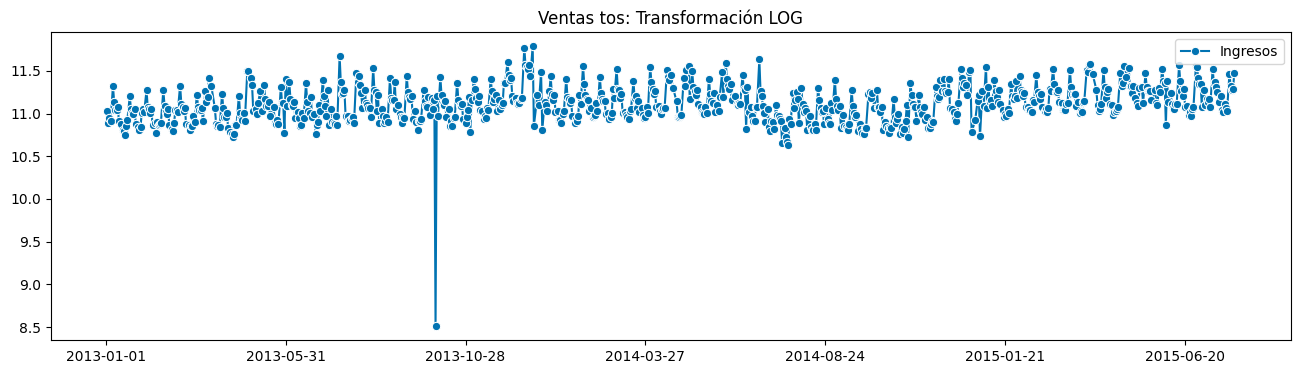

In [59]:
# Estacionareidad
from sktime.transformations.series.boxcox import LogTransformer

df_tos = ventas_T_diarias['Sales']
transformer = LogTransformer()
log_tos= transformer.fit_transform(df_tos)
log_tos.tail()

fig, ax =plot_series(log_tos, labels=["Ingresos"])
ax.set_title('Ventas tos: Transformación LOG')

### 4. Graficar las ventas totales semanales.

In [60]:
ventas_totales_semanales = df.resample('W').sum()
ventas_totales_semanales.index = ventas_totales_semanales.index.strftime('%Y-%m-%d')
ventas_totales_semanales.index = pd.to_datetime(ventas_totales_semanales.index)
ventas_totales_semanales.index = ventas_totales_semanales.index.to_period('W')

In [61]:
ventas_totales_semanales.head()

Sales
Date                         
2012-12-31/2013-01-06  227030
2013-01-07/2013-01-13  395390
2013-01-14/2013-01-20  305576
2013-01-21/2013-01-27  372581
2013-01-28/2013-02-03  335998

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: xlabel='Fecha', ylabel='Ventas'>)

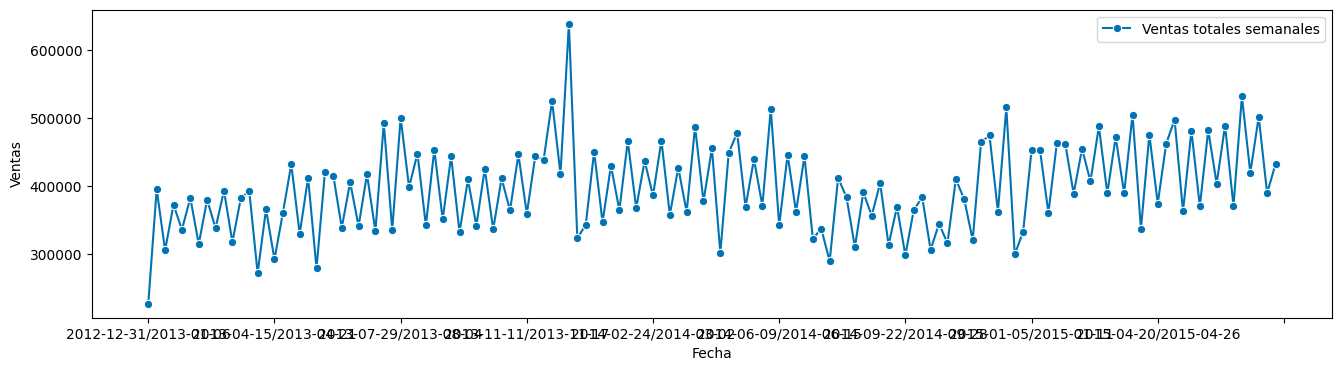

In [62]:
plot_series(ventas_totales_semanales, labels=["Ventas totales semanales"],x_label= 'Fecha', y_label='Ventas')

### 5. Predecir las ventas totales diarias.

In [63]:
from prophet import Prophet


In [64]:
y = ventas_T_diarias.reset_index(drop=False)
y.columns = ['ds', 'y']

In [65]:
y['ds'] = y['ds'].dt.to_timestamp('D')

<AxesSubplot: >

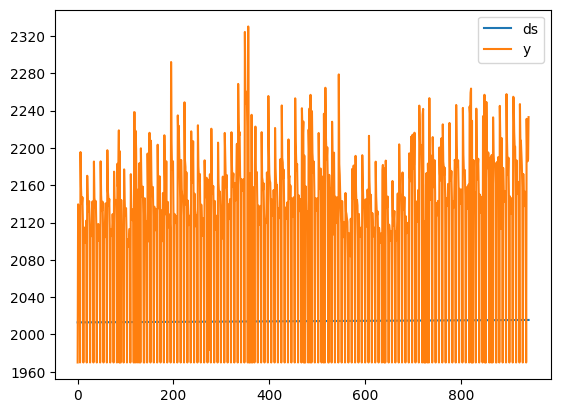

In [66]:
y.plot()

In [67]:
train = y.iloc[:745,:]
test = y.iloc[745:,:]

In [68]:
from prophet import Prophet
m = Prophet()
m.fit(train)

19:34:20 - cmdstanpy - INFO - Chain [1] start processing
19:34:20 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
future = m.make_future_dataframe(periods=len(test))
forecast = m.predict(future)

In [70]:
from sklearn.metrics import r2_score
print(r2_score(list(test['y']), list(forecast.loc[745:,'yhat'] )))

0.6007890832403079


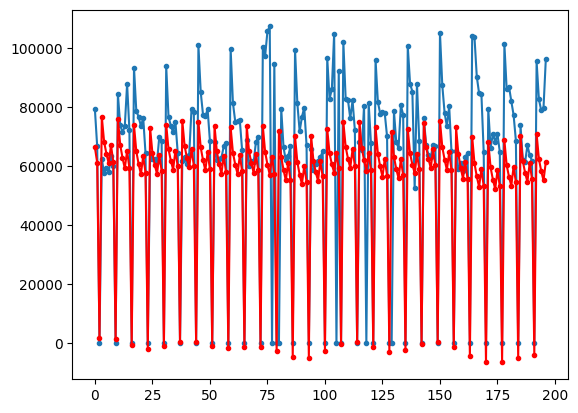

In [71]:
import matplotlib.pyplot as plt
plt.plot(list(test['y']),'.-')
plt.plot(list(forecast.loc[745:,'yhat']),'r.-')
plt.show()

#### Añadimos estacionalidad semanal,mensual y anual

In [72]:
m2 = Prophet()
m2.add_seasonality(name='weekly', period=7, fourier_order=5)
m2.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m2.add_seasonality(name='yearly', period=365.25, fourier_order=5)



m2.fit(train)

future2 = m2.make_future_dataframe(periods=len(test))
forecast2 = m2.predict(future2)
print(r2_score(list(test['y']), list(forecast2.loc[745:,'yhat'] )))

19:34:22 - cmdstanpy - INFO - Chain [1] start processing
19:34:22 - cmdstanpy - INFO - Chain [1] done processing


0.5902129265069169


Probamos un nuevo Prophet añadiendo estacionalidades mensuales y anuales, añadiendo así mismo la parte del dataframe de holidays para intentar mejorar el modelo, en búsquedad de que la predicción sea lo mejor posible

In [73]:
holidays = pd.read_csv('../data/raw/datos.csv')
holidays["Date"] = pd.to_datetime(holidays["Date"])
holidays = holidays.set_index('Date').sort_index()
holidays = holidays.reset_index()

In [74]:
holidays["StateHoliday"] = holidays["StateHoliday"].replace(["a", "b", "c"], 1)

In [75]:
holidays = holidays[holidays['StateHoliday'] == 1]
holidays = holidays[['Date', 'StateHoliday']]
holidays = holidays.drop(['StateHoliday'], axis=1)
holidays['holiday'] = 'holiday'
holidays.columns = ['ds', 'holiday']

In [76]:
m3 = Prophet(holidays=holidays)

m3.add_seasonality(name='monthly', period=30.5, fourier_order=7)
m3.add_seasonality(name='yearly', period=365.25, fourier_order=3)
m3.fit(train)
future3 = m3.make_future_dataframe(periods=len(test))
forecast3 = m3.predict(future3)

print(r2_score(list(test['y']), list(forecast3.loc[745:,'yhat'] )))

19:34:23 - cmdstanpy - INFO - Chain [1] start processing
19:34:23 - cmdstanpy - INFO - Chain [1] done processing


0.7544461831698667


Observando el resultado, de los tres modelos de Prophet que hemos realizado, este es el que mejor R^2 hemos obtenido, por lo tanto realizaremos las predicciones de los próximos 40 días mediante este modelo.

### Predicciones mediante Prophet

In [77]:
m3 = Prophet(holidays=holidays)
m3.add_seasonality(name='monthly', period=30.5, fourier_order=7)
m3.add_seasonality(name='yearly', period=365.25, fourier_order=5)
m3.fit(y)
future3 = m3.make_future_dataframe(periods=41)
forecast3 = m3.predict(future3)

19:34:24 - cmdstanpy - INFO - Chain [1] start processing
19:34:24 - cmdstanpy - INFO - Chain [1] done processing


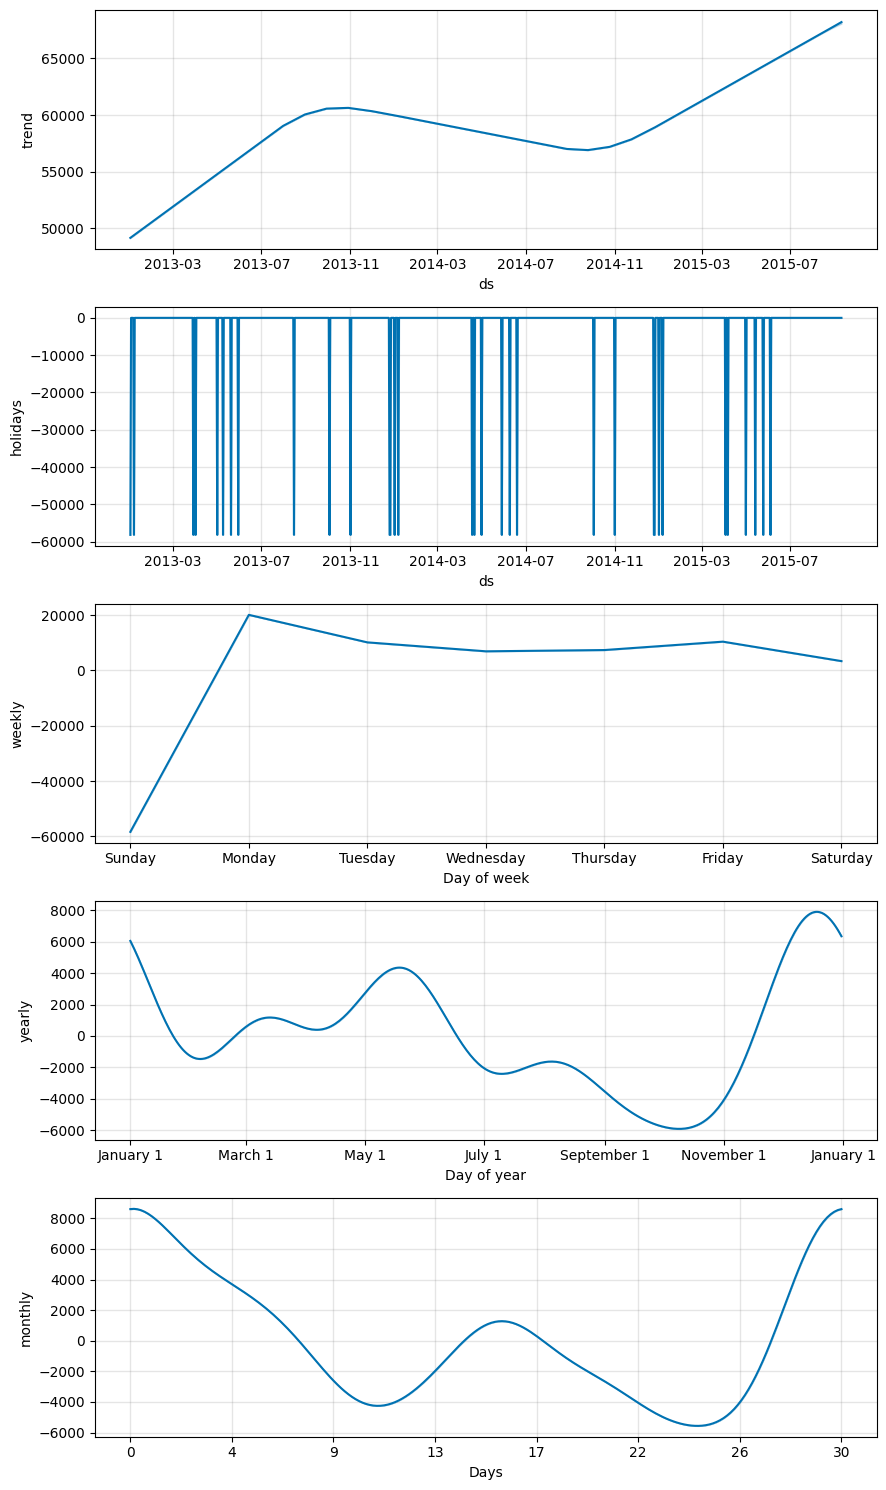

In [78]:
# Tendencia y estacionalidad del modelo
fig2 = m3.plot_components(forecast3)
plt.show()

In [79]:
forecast3[942:].head()

ds         trend    yhat_lower     yhat_upper   trend_lower  \
942 2015-08-01  66755.391992  62596.449336   90506.313594  66755.391992   
943 2015-08-02  66791.455043    578.239413   29698.429392  66791.455043   
944 2015-08-03  66827.518094  78660.870118  107571.453031  66827.518094   
945 2015-08-04  66863.581145  67495.794734   94870.067948  66863.581145   
946 2015-08-05  66899.644196  61871.329054   89665.344366  66899.644196   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
942  66755.391992     9914.062874           9914.062874           9914.062874   
943  66791.455043   -51486.898988         -51486.898988         -51486.898988   
944  66827.518094    25806.294817          25806.294817          25806.294817   
945  66863.581145    14359.610036          14359.610036          14359.610036   
946  66899.644196     9866.872434           9866.872434           9866.872434   

     holiday  ...        weekly  weekly_lower  weekly_upper       yearly  \
942      0.0  ...   3380.220175   3380.220175   3380.220175 -1679.197398   
943      0.0  ... -58329.827963 -58329.827963 -58329.827963 -1659.310931   
944      0.0  ...  20094.819801  20094.819801  20094.819801 -1644.597063   
945      0.0  ...  10150.943474  10150.943474  10150.943474 -1635.345176   
946      0.0  ...   6920.991374   6920.991374   6920.991374 -1631.800558   

     yearly_lower  yearly_upper  multiplicative_terms  \
942  -1679.197398  -1679.197398                   0.0   
943  -1659.310931  -1659.310931                   0.0   
944  -1644.597063  -1644.597063                   0.0   
945  -1635.345176  -1635.345176                   0.0   
946  -1631.800558  -1631.800558                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
942                         0.0                         0.0  76669.454867  
943                         0.0                         0.0  15304.556055  
944                         0.0                         0.0  92633.812911  
945                         0.0                         0.0  81223.191181  
946                         0.0                         0.0  76766.516630  

[5 rows x 28 columns]

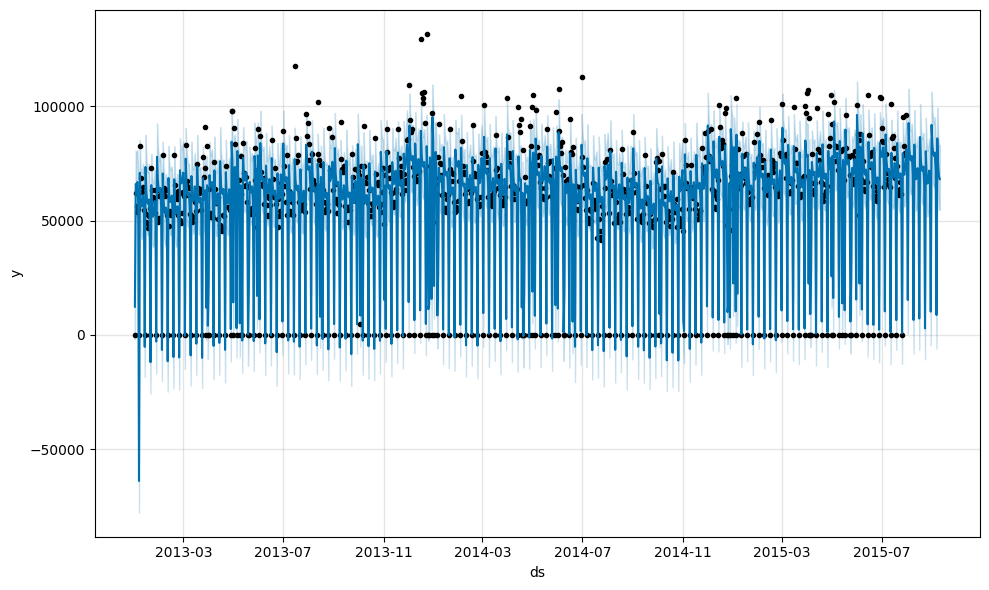

In [80]:
plot1 = m3.plot(forecast3)

In [81]:
predictions_daily =  forecast3[['ds', 'yhat']].iloc[942:]
predictions_daily['yhat'] = predictions_daily['yhat'].where(predictions_daily['yhat'] > 16000, 0)

In [82]:
predictions_daily.head()

ds          yhat
942 2015-08-01  76669.454867
943 2015-08-02      0.000000
944 2015-08-03  92633.812911
945 2015-08-04  81223.191181
946 2015-08-05  76766.516630

### Predicción de Gráficas semanales

In [83]:
y_train, y_test = ventas_totales_semanales['Sales'].astype('float64')[:120],ventas_totales_semanales['Sales'].astype('float64')[120:]


(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: >)

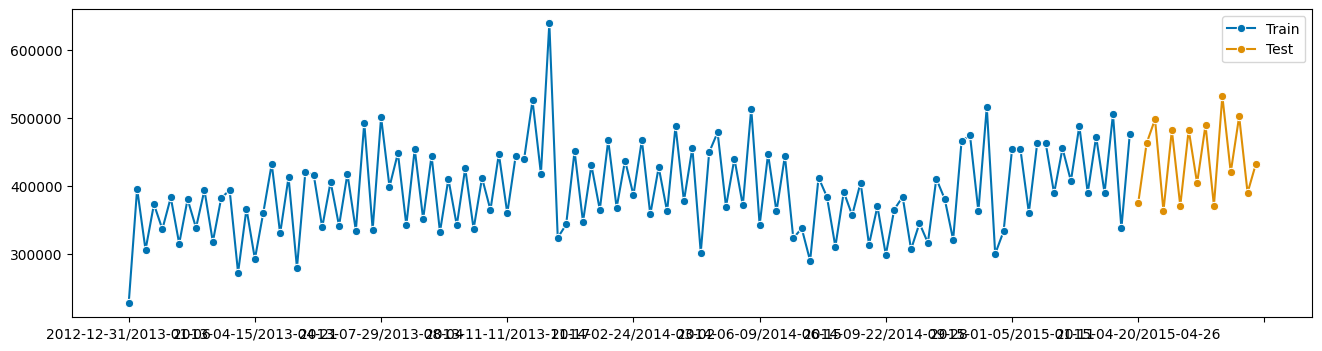

In [84]:
plot_series(y_train, y_test, labels=["Train", "Test"])

Realizamos un modelo ETS para predecir las ventas semanales, para ello fijamos que no tiene tendencia y que tiene una estacionalidad aditiva y que tiene un formato semanal.

In [85]:
model = AutoETS(auto=False, trend=None,seasonal="add",n_jobs=-1, sp=52)  


In [86]:
fh_test = np.arange(1, len(y_test) +1)

In [87]:
model.fit(y_train)

AutoETS(n_jobs=-1, seasonal='add', sp=52)

In [88]:
# Performance
#from sktime.performance_metrics.forecasting import MeanSquaredError
#from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
#from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
RMSE = MeanSquaredError(square_root=True)
MAPE = MeanAbsolutePercentageError(symmetric=False)

def ForecastPerformance(original,forecast):
    print(f'RMSE: {round(RMSE(original, forecast),2)}')
    print(f'MAPE: {round(MAPE(original, forecast)*100,2)}%')

In [89]:
predictions = model.predict(fh_test)

In [90]:
ForecastPerformance(y_test,predictions)

RMSE: 45070.48
MAPE: 9.11%


(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: >)

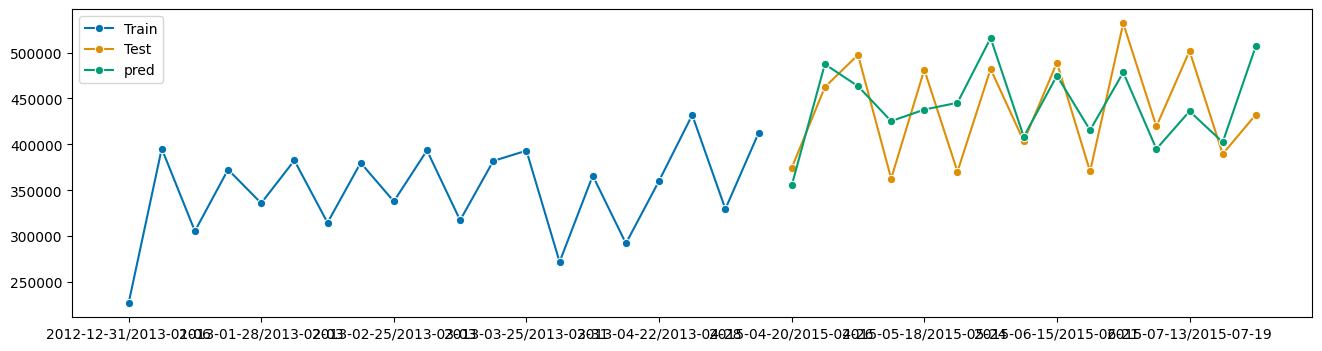

In [91]:
plot_series(y_train[:20], y_test, predictions, labels=["Train", "Test","pred"])

Observamos cuales son los resultados que hemos obtenido, teniendo en cuenta que son mejorables realizaremos una validación cruzada para el modelo ETS

### Cross validation para modelo ETS

In [92]:
# Cross Validation
#from sktime.forecasting.exp_smoothing import ExponentialSmoothing
#from sktime.forecasting.naive import NaiveForecaster
#from sktime.forecasting.model_selection import ExpandingWindowSplitter
#from sktime.forecasting.model_selection import ForecastingGridSearchCV
#from sktime.forecasting.compose import TransformedTargetForecaster

# Inputs: transformaciones y modelos
pipe = TransformedTargetForecaster(steps=[
    ("forecaster", NaiveForecaster())])
# Defenir el CV
cv = ExpandingWindowSplitter(
    initial_window=60,
     step_length=1,
     start_with_window=True,
     fh=fh_test)
# definir los modelos y los parametros (GRID)
gscv = ForecastingGridSearchCV(
     forecaster=pipe,
    param_grid=[{
         "forecaster": [NaiveForecaster(sp=52)],
         "forecaster__strategy": ["drift", "last", "mean"],
     },
     {
          "forecaster": [ExponentialSmoothing(sp=52)],
          "forecaster__trend": ["add", "mul"],
          "forecaster__damped_trend": [True,False],
          "forecaster__seasonal": ["add", "mul"],
    },
     ],
     cv=cv,
     verbose=1,
     n_jobs=-1)

In [93]:
# estimar todos los modelos pot CV 
gscv.fit(y_train)  

Fitting 46 folds for each of 11 candidates, totalling 506 fits


/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/naive.py:167: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn("For the `drift` strategy, the `sp` value will be ignored.")
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=60.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(damped_trend=True,
                                                         seasonal='add', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=85.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(damped_trend=True,
                                                         seasonal='add', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/naive.py:167: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn("For the `drift` strategy, the `sp` value will be ignored.")
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=97.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(damped_trend=True,
                                                         seasonal='add', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/naive.py:167: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn("For the `drift` strategy, the `sp` value will be ignored.")
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=63.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(damped_trend=True,
                                                         seasonal='add', sp=52,
                                                         trend='mul'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/naive.py:167: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn("For the `drift` strategy, the `sp` value will be ignored.")
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=77.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(damped_trend=True,
                                                         seasonal='add', sp=52,
                                                         trend='mul'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/naive.py:167: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn("For the `drift` strategy, the `sp` value will be ignored.")
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=60.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(damped_trend=True,
                                                         seasonal='mul', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=87.

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=64.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(seasonal='add', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=67.
                The score will be set to nan.
                Failed foreca

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=99.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(damped_trend=True,
                                                         seasonal='add', sp=52,
                                                         trend='mul'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=74.

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=77.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(damped_trend=True,
                                                         seasonal='mul', sp=52,
                                                         trend='mul'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=75.

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=85.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(seasonal='add', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=89.
                The score will be set to nan.
                Failed foreca

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=101.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(seasonal='add', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=69.
                The score will be set to nan.
                Failed forec

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=60.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(seasonal='mul', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=82.
                The score will be set to nan.
                Failed foreca

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=72.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(seasonal='mul', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=93.
                The score will be set to nan.
                Failed foreca

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=77.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(seasonal='mul', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=98.
                The score will be set to nan.
                Failed foreca

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=82.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(seasonal='mul', sp=52,
                                                         trend='mul'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=86.
                The score will be set to nan.
                Failed foreca

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=96.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(seasonal='mul', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=93.
                The score will be set to nan.
                Failed foreca

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retval

ForecastingGridSearchCV(cv=ExpandingWindowSplitter(fh=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                                                   initial_window=60),
                        forecaster=TransformedTargetForecaster(steps=[('forecaster',
                                                                       NaiveForecaster())]),
                        n_jobs=-1,
                        param_grid=[{'forecaster': [NaiveForecaster(sp=52)],
                                     'forecaster__strategy': ['drift', 'last',
                                                              'mean']},
                                    {'forecaster': [ExponentialSmoothing(sp=52)],
                                     'forecaster__damped_trend': [True, False],
                                     'forecaster__seasonal': ['add', 'mul'],
                                     'forecaster__trend': ['add', 'mul']}],
                        verbose=1)

In [94]:
# Los resultados
gscv.cv_results_

mean_test_MeanAbsolutePercentageError  mean_fit_time  mean_pred_time  \
0                                0.198281       0.041193        0.017666   
1                                0.155812       0.041000        0.014086   
2                                0.165716       0.042130        0.015004   
3                                0.146922       0.285299        0.028938   
4                                0.105539       0.461684        0.015009   
5                                0.141086       0.279962        0.023029   
6                                0.139195       0.494488        0.014558   
7                                0.155452       0.311623        0.013451   
8                                0.160009       0.346387        0.018625   
9                                1.101702       0.155173        0.014392   
10                               0.462757       0.261731        0.008248   

                                               params  \
0   {'forecaster': NaiveForecaster(sp=52, strategy...   
1   {'forecaster': NaiveForecaster(sp=52), 'foreca...   
2   {'forecaster': NaiveForecaster(sp=52, strategy...   
3   {'forecaster': ExponentialSmoothing(damped_tre...   
4   {'forecaster': ExponentialSmoothing(damped_tre...   
5   {'forecaster': ExponentialSmoothing(damped_tre...   
6   {'forecaster': ExponentialSmoothing(damped_tre...   
7   {'forecaster': ExponentialSmoothing(seasonal='...   
8   {'forecaster': ExponentialSmoothing(seasonal='...   
9   {'forecaster': ExponentialSmoothing(seasonal='...   
10  {'forecaster': ExponentialSmoothing(seasonal='...   

    rank_test_MeanAbsolutePercentageError  
0                                     9.0  
1                                     6.0  
2                                     8.0  
3                                     4.0  
4                                     1.0  
5                                     3.0  
6                                     2.0  
7                                     5.0  
8                                     7.0  
9                                    11.0  
10                                   10.0

In [95]:
# el tercer modelo
gscv.cv_results_["params"][3]

{'forecaster': ExponentialSmoothing(damped_trend=True, seasonal='add', sp=52, trend='add'),
 'forecaster__damped_trend': True,
 'forecaster__seasonal': 'add',
 'forecaster__trend': 'add'}

In [96]:
# El performance del mejor modelo
gscv.best_score_

0.10553948987730635

In [97]:
# Predicción
cv_pred = gscv.predict(fh_test) 
cv_pred

2015-04-20/2015-04-26    329560.017587
2015-04-27/2015-05-03    479668.798351
2015-05-04/2015-05-10    511308.440167
2015-05-11/2015-05-17    404064.071825
2015-05-18/2015-05-24    477033.357936
2015-05-25/2015-05-31    410806.377525
2015-06-01/2015-06-07    555015.160197
2015-06-08/2015-06-14    386459.618400
2015-06-15/2015-06-21    493924.673915
2015-06-22/2015-06-28    412547.024414
2015-06-29/2015-07-05    473184.689530
2015-07-06/2015-07-12    389626.852144
2015-07-13/2015-07-19    548586.326008
2015-07-20/2015-07-26    392279.415382
2015-07-27/2015-08-02    558010.194678
Freq: W-SUN, dtype: float64

In [98]:
# Performace

ForecastPerformance(y_test, cv_pred)

RMSE: 48694.62
MAPE: 8.71%


(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: >)

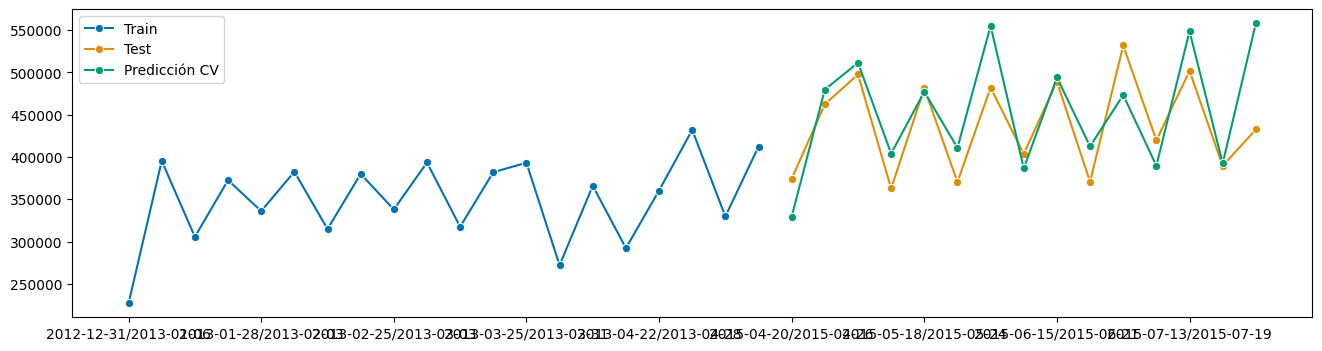

In [99]:
# Grafico zoom de las predicciones
plot_series(y_train[:20],y_test, cv_pred, labels=["Train", "Test","Predicción CV"])

Observamos como mediante la validación cruzada mejora notablemente el MAPE, y al graficarlo observamos como se asemeja mas al test. Por lo tanto, utilizaremos el modelo de validación cruzada para sacar las predicciones de las 5 semanas posteriores

### Predicciones Semanales

In [100]:
gscv.fit(ventas_totales_semanales)  

Fitting 61 folds for each of 11 candidates, totalling 671 fits


/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/naive.py:167: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn("For the `drift` strategy, the `sp` value will be ignored.")
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=60.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(damped_trend=True,
                                                         seasonal='add', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=76.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(damped_trend=True,
                                                         seasonal='add', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/naive.py:167: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn("For the `drift` strategy, the `sp` value will be ignored.")
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/naive.py:167: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn("For the `drift` strategy, the `sp` value will be ignored.")
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=87.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(damped_trend=True,
                                                         seasonal='add', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=101.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(damped_trend=True,
                                                         seasonal='add', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/naive.py:167: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn("For the `drift` strategy, the `sp` value will be ignored.")
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/naive.py:167: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn("For the `drift` strategy, the `sp` value will be ignored.")
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/naive.py:167: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn("For the `drift` strategy, the `sp` value will be ignored.")
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/naive.py:167: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn("For the `drift` strategy, the `sp` value will be ignored.")
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/si

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=65.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(damped_trend=True,
                                                         seasonal='add', sp=52,
                                                         trend='mul'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=66.

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=71.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(damped_trend=True,
                                                         seasonal='mul', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=76.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(damped_trend=True,
                                                         seasonal='add', sp=52,
                                                         trend='mul'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=77.

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=82.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(damped_trend=True,
                                                         seasonal='add', sp=52,
                                                         trend='mul'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=83.

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=88.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(damped_trend=True,
                                                         seasonal='add', sp=52,
                                                         trend='mul'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=89.

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=96.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(damped_trend=True,
                                                         seasonal='mul', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=96.

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=65.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(seasonal='add', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=103.
                The score will be set to nan.
                Failed forec

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=82.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(seasonal='add', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of 

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=97.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(seasonal='add', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=98.
                The score will be set to nan.
                Failed foreca

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retval

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=71.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(seasonal='add', sp=52,
                                                         trend='mul'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=72.
                The score will be set to nan.
                Failed foreca

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=86.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(seasonal='add', sp=52,
                                                         trend='mul'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of 

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=60.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(seasonal='mul', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=99.
                The score will be set to nan.
                Failed foreca

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=69.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(seasonal='mul', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of 

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=78.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(seasonal='mul', sp=52,
                                                         trend='add'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=70.
                The score will be set to nan.
                Failed foreca

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=79.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(seasonal='mul', sp=52,
                                                         trend='mul'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=87.
                The score will be set to nan.
                Failed foreca

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=90.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(seasonal='mul', sp=52,
                                                         trend='mul'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=91.
                The score will be set to nan.
                Failed foreca

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=102.
                The score will be set to nan.
                Failed forecaster: TransformedTargetForecaster(steps=[('forecaster',
                                    ExponentialSmoothing(seasonal='mul', sp=52,
                                                         trend='mul'))]).
                
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/sktime/forecasting/model_evaluation/_functions.py:182: FitFailedWarning: 
                Fitting of forecaster failed, you can set error_score='raise' to see
                the exception message. Fit failed for len(y_train)=103.
                The score will be set to nan.
                Failed fore

/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/eduardo/opt/anaconda3/envs/PEDRICCION/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retval

ForecastingGridSearchCV(cv=ExpandingWindowSplitter(fh=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                                                   initial_window=60),
                        forecaster=TransformedTargetForecaster(steps=[('forecaster',
                                                                       NaiveForecaster())]),
                        n_jobs=-1,
                        param_grid=[{'forecaster': [NaiveForecaster(sp=52)],
                                     'forecaster__strategy': ['drift', 'last',
                                                              'mean']},
                                    {'forecaster': [ExponentialSmoothing(sp=52)],
                                     'forecaster__damped_trend': [True, False],
                                     'forecaster__seasonal': ['add', 'mul'],
                                     'forecaster__trend': ['add', 'mul']}],
                        verbose=1)

In [101]:
fh1 = np.arange(1,6)
predictions1 = gscv.predict(fh1)
predictions1

Sales
2015-08-03/2015-08-09  430688.059209
2015-08-10/2015-08-16  475763.554376
2015-08-17/2015-08-23  376603.501891
2015-08-24/2015-08-30  483049.512498
2015-08-31/2015-09-06  385460.580214

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: >)

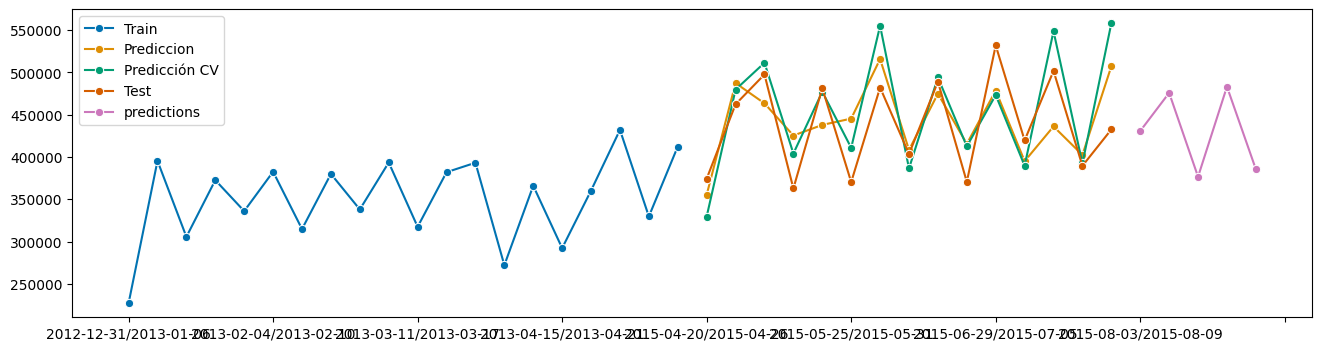

In [102]:
# Grafico zoom de las predicciones
plot_series(y_train[:20], predictions, cv_pred, y_test,predictions1, labels=["Train", "Prediccion","Predicción CV", "Test",'predictions'])

In [103]:
#predictions1.to_csv('../data/predi_semanales.csv', header=False,  index=False)